# CASE STUDY 10

Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
            
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
            
• bruises: bruises=t, no=f

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=

• gill-spacing: close=c, crowded=w, distant=d

• gill-size: broad=b, narrow=n

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

• stalk-shape: enlarging=e, tapering=t

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• veil-type: partial=p, universal=u

• veil-colour: brown=n, orange=o, white=w, yellow=y

• ring-number: none=n, one=o, two=t

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


# Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
data = pd.read_csv("mushrooms.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.shape

(8124, 23)

There are 8124 rows and 23 columns

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can see that there are no null values

In [6]:
data.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [7]:
x=data.columns
x

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

To find the unique values in each columns-

In [8]:
for i in x:
    print(i)
    print(data[i].value_counts())

class
e    4208
p    3916
Name: class, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
bruises
f    4748
t    3376
Name: bruises, dtype: int64
odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64
stalk-root
b    3776
?  

In [9]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [10]:
data=data.replace(to_replace ="?",value ="b")

In [11]:
data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

We have changed '?' to mode or most occuring value 'b'

In [12]:
#describing the data
data.describe().T 

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

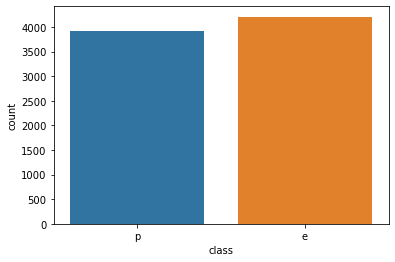

In [13]:
sns.countplot(data['class'])

Majority of the mushrooms can be seen as edible.

# Splitting the dataset into features and target

In [14]:
x=data.drop('class',axis=1)
y=data['class']

In [15]:
#Encoding X
X=pd.get_dummies(x,drop_first=True)

In [16]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Splitting the dataset into training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [18]:
# importing alll the necessary libraries to use in various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K Nearest Neighbours
from sklearn.svm import SVC # for Support Vector Machine (SVM) Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for using Random Forest Algoithm

In [19]:
# importing necessary libraries for checking the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 1. Logistic Regression

In [20]:
logitreg = LogisticRegression(max_iter = 700)
logitreg.fit(X_train,y_train) 
y_predict = logitreg.predict(X_test)

In [21]:
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test,y_predict)

0.9991796554552912


array([[1257,    0],
       [   2, 1179]], dtype=int64)

In [22]:
logitreg_as = accuracy_score(y_test,y_predict)
logitreg_as

0.9991796554552912

# K-Nearest Neighbours(KNN)

In [23]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_predict1))
confusion_matrix(y_test,y_predict1)

1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [25]:
logitreg_as1 = accuracy_score(y_test,y_predict1)
logitreg_as1

1.0

# DecisionTree

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict2=dt.predict(X_test)

In [27]:
print(accuracy_score(y_test,y_predict2))
confusion_matrix(y_test,y_predict2)

1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [28]:
logitreg_as2 = accuracy_score(y_test,y_predict2)
logitreg_as2

1.0

# Random Forest

In [29]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict3=rf.predict(X_test)

In [30]:
print(accuracy_score(y_test,y_predict3))
confusion_matrix(y_test,y_predict3)

1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [31]:
logitreg_as3 = accuracy_score(y_test,y_predict3)
logitreg_as3

1.0

# Support Vector Machine (SVM)

In [32]:
svm_model = SVC(kernel = 'rbf',C=30,gamma='auto') 
svm_model.fit(X_train,y_train) 
y_predict4 = svm_model.predict(X_test) 

In [33]:
print(accuracy_score(y_test,y_predict3))
confusion_matrix(y_test,y_predict4)

1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [34]:
logitreg_as4 = accuracy_score(y_test,y_predict4)
logitreg_as4

1.0

# Naive Bayes

Gaussian NB

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_predict5 = classifier.predict(X_test) 

In [36]:
print(accuracy_score(y_test,y_predict5))
confusion_matrix(y_test,y_predict5)

0.9487284659557014


array([[1133,  124],
       [   1, 1180]], dtype=int64)

In [37]:
logitreg_as5 = accuracy_score(y_test,y_predict5)
logitreg_as5

0.9487284659557014

Bernoulli NB

In [38]:
from sklearn.naive_bayes import BernoulliNB
classifier1=BernoulliNB()
classifier1.fit(X_train,y_train)
y_predict6 = classifier1.predict(X_test) 

In [39]:
logitreg_as6 = accuracy_score(y_test,y_predict6)
logitreg_as6

0.9339622641509434

# Comparison of all models

Text(0.5, 1.0, 'Model Comparison - Model Accuracy')

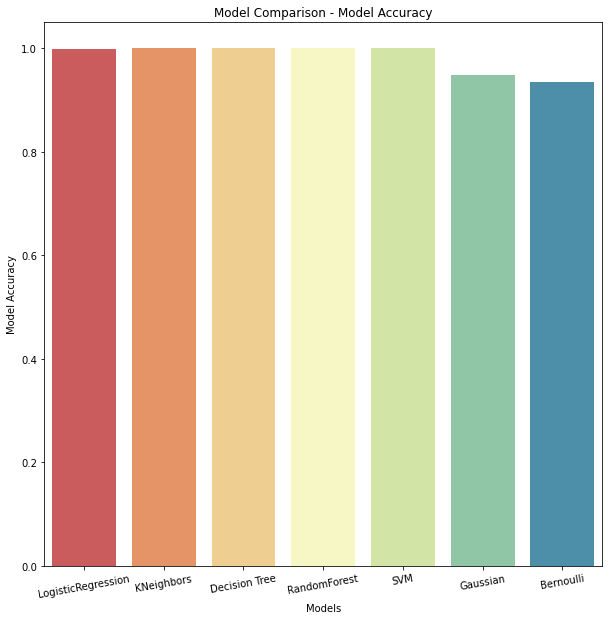

In [40]:
plt.style.use("fast")
x = ["LogisticRegression","KNeighbors","Decision Tree","RandomForest","SVM","Gaussian","Bernoulli"]

y = [logitreg_as,logitreg_as1,logitreg_as2,logitreg_as3,logitreg_as4,logitreg_as5,logitreg_as6]

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=x,y=y, palette="Spectral");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=10)
plt.title("Model Comparison - Model Accuracy")


All models except two naive bayes models are giving 100% accuracy. Among two naive bayes GaussianNB performed slightly better